In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale as scl

In [2]:
# grab the CSV as a dataframe
DF = pd.read_csv('final_combine_player_data.csv')
DF['IDX'] = DF.index

In [3]:
DF.head()

Year           Name   Age    PER    GS    GP    TS%     FTr    OWS    DWS  \
0  2010   Aaron Brooks  25.0  16.00  82.0  82.0  0.549  0.2240  3.900  1.600   
1  2010       Acie Law  25.0  15.05   0.5  13.0  0.584  0.6905  0.175  0.075   
2  2010  Al Harrington  29.0  16.80  15.0  72.0  0.546  0.3080  2.200  1.300   
3  2010     Al Horford  23.0  19.40  81.0  81.0  0.594  0.3190  6.900  3.900   
4  2010   Al Jefferson  25.0  19.00  76.0  76.0  0.524  0.2360  2.300  2.300   

  ...   player_weight  Salary Cap  Injury_DTD  Injury_DNP  Injury_Out_Indef  \
0 ...       73.028312    57700000         0.0         0.0               0.0   
1 ...       91.625584    57700000         0.0         0.0               0.0   
2 ...      113.398000    57700000         0.0         0.0               0.0   
3 ...      111.130040    57700000         0.0         0.0               0.0   
4 ...      127.005760    57700000         0.0         0.0               0.0   

   Injury_Out_Season  Injury_Returned  Injury_Other    Salary%  IDX  
0                0.0              0.0           0.0   3.495133    0  
1                0.0              0.0           0.0   1.097492    1  
2                0.0              0.0           0.0   9.991334    2  
3                0.0              0.0           0.0   9.436494    3  
4                0.0              0.0           0.0  22.530329    4  

[5 rows x 61 columns]

In [4]:
physicalDF = DF[['Age', 'player_height', 'player_weight', 'IDX']]
regPerfDF = DF[['ORPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PFPG', 'PPG', 'FGAPG', '3PPG', '2PAPG', 'IDX']]
advPerfDF = DF[['TS%', '3PA', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP', 'IDX']]
PERDF = DF[['PER', 'IDX']]

In [5]:
# tune hyperparameters
k_phys = 3
k_reg = 3
k_adv = 3
k_per = 3

In [6]:
kmPhys = KMeans(n_clusters=k_phys, random_state=1).fit(scl(physicalDF.iloc[:, :-1]))
kmReg = KMeans(n_clusters=k_reg, random_state=1).fit(scl(regPerfDF.iloc[:, :-1]))
kmAdv = KMeans(n_clusters=k_adv, random_state=1).fit(scl(advPerfDF.iloc[:, :-1]))
kmPER = KMeans(n_clusters=k_per, random_state=1).fit(scl(PERDF.iloc[:, :-1]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1D189F320>,
      dtype=object)

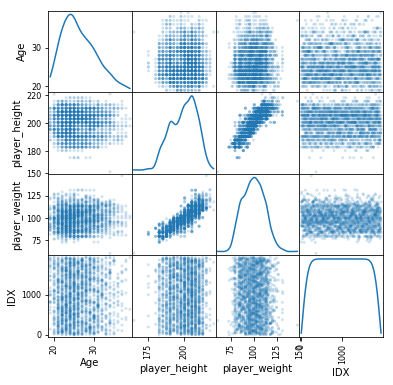

In [8]:
# check projections to see if it looks okay
from pandas.plotting import scatter_matrix
scatter_matrix(physicalDF, alpha = 0.2, figsize = (6,6), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1D3CBB2B0>,
      dtype=object)

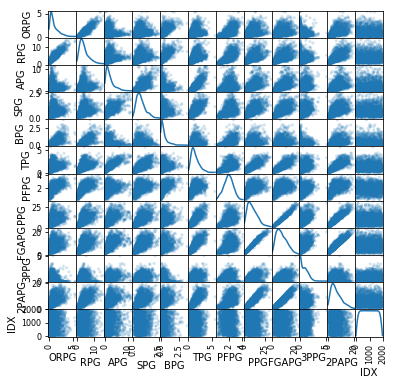

In [9]:
# check reg perf
scatter_matrix(regPerfDF, alpha = 0.2, figsize =(6,6), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B9E937470>,
      dtype=object)

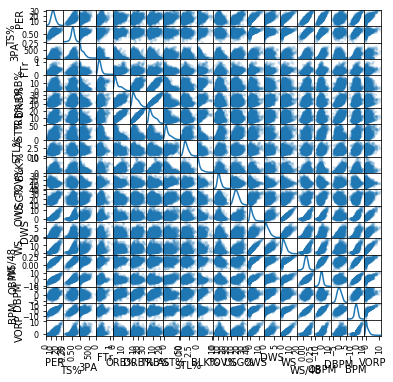

In [15]:
# adv perf
scatter_matrix(advPerfDF, alpha = 0.2, figsize = (6,6), diagonal = 'kde')

In [7]:
physicalDF['Cluster Label'] = kmPhys.labels_
regPerfDF['Cluster Label'] = kmReg.labels_
advPerfDF['Cluster Label'] = kmAdv.labels_
PERDF['Cluster Label'] = kmPER.labels_

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [8]:
PERDF.head()

PER  IDX  Cluster Label
0  16.00    0              2
1  15.05    1              2
2  16.80    2              2
3  19.40    3              1
4  19.00    4              1

In [9]:
# Add cluster values to DF
physicalDF = physicalDF.rename({'Cluster Label' : 'Physical Cluster'}, axis = 'columns')
regPerfDF = regPerfDF.rename({'Cluster Label' : 'Reg Performance Cluster'}, axis = 'columns')
advPerfDF = advPerfDF.rename({'Cluster Label' : 'Adv Performance Cluster'}, axis = 'columns')
PERDF = PERDF.rename({'Cluster Label' : 'PER Cluster'}, axis = 'columns')

In [10]:
DF = DF.merge(physicalDF[['IDX', 'Physical Cluster']], on = 'IDX', how = 'left')
DF = DF.merge(regPerfDF[['IDX', 'Reg Performance Cluster']], on = 'IDX', how = 'left')
DF = DF.merge(advPerfDF[['IDX', 'Adv Performance Cluster']], on = 'IDX', how = 'left')
DF = DF.merge(PERDF[['IDX', 'PER Cluster']], on = 'IDX', how = 'left')
DF.head()

Year           Name   Age    PER    GS    GP    TS%     FTr    OWS    DWS  \
0  2010   Aaron Brooks  25.0  16.00  82.0  82.0  0.549  0.2240  3.900  1.600   
1  2010       Acie Law  25.0  15.05   0.5  13.0  0.584  0.6905  0.175  0.075   
2  2010  Al Harrington  29.0  16.80  15.0  72.0  0.546  0.3080  2.200  1.300   
3  2010     Al Horford  23.0  19.40  81.0  81.0  0.594  0.3190  6.900  3.900   
4  2010   Al Jefferson  25.0  19.00  76.0  76.0  0.524  0.2360  2.300  2.300   

      ...       Injury_Out_Indef  Injury_Out_Season  Injury_Returned  \
0     ...                    0.0                0.0              0.0   
1     ...                    0.0                0.0              0.0   
2     ...                    0.0                0.0              0.0   
3     ...                    0.0                0.0              0.0   
4     ...                    0.0                0.0              0.0   

   Injury_Other    Salary%  IDX  Physical Cluster  Reg Performance Cluster  \
0           0.0   3.495133    0                 1                        0   
1           0.0   1.097492    1                 1                        1   
2           0.0   9.991334    2                 2                        0   
3           0.0   9.436494    3                 0                        2   
4           0.0  22.530329    4                 0                        2   

   Adv Performance Cluster  PER Cluster  
0                        2            2  
1                        0            2  
2                        0            2  
3                        1            1  
4                        1            1  

[5 rows x 65 columns]

In [11]:
DF = DF.drop('IDX', axis = 1)
DF.head()

Year           Name   Age    PER    GS    GP    TS%     FTr    OWS    DWS  \
0  2010   Aaron Brooks  25.0  16.00  82.0  82.0  0.549  0.2240  3.900  1.600   
1  2010       Acie Law  25.0  15.05   0.5  13.0  0.584  0.6905  0.175  0.075   
2  2010  Al Harrington  29.0  16.80  15.0  72.0  0.546  0.3080  2.200  1.300   
3  2010     Al Horford  23.0  19.40  81.0  81.0  0.594  0.3190  6.900  3.900   
4  2010   Al Jefferson  25.0  19.00  76.0  76.0  0.524  0.2360  2.300  2.300   

      ...       Injury_DNP  Injury_Out_Indef  Injury_Out_Season  \
0     ...              0.0               0.0                0.0   
1     ...              0.0               0.0                0.0   
2     ...              0.0               0.0                0.0   
3     ...              0.0               0.0                0.0   
4     ...              0.0               0.0                0.0   

   Injury_Returned  Injury_Other    Salary%  Physical Cluster  \
0              0.0           0.0   3.495133                 1   
1              0.0           0.0   1.097492                 1   
2              0.0           0.0   9.991334                 2   
3              0.0           0.0   9.436494                 0   
4              0.0           0.0  22.530329                 0   

   Reg Performance Cluster  Adv Performance Cluster  PER Cluster  
0                        0                        2            2  
1                        1                        0            2  
2                        0                        0            2  
3                        2                        1            1  
4                        2                        1            1  

[5 rows x 64 columns]

In [12]:
AnalysisDF = DF[['Year', 'Name', 'Salary%', 'Physical Cluster', 'Reg Performance Cluster', 'Adv Performance Cluster', 'PER']]
AnalysisDF.head()

Year           Name    Salary%  Physical Cluster  Reg Performance Cluster  \
0  2010   Aaron Brooks   3.495133                 1                        0   
1  2010       Acie Law   1.097492                 1                        1   
2  2010  Al Harrington   9.991334                 2                        0   
3  2010     Al Horford   9.436494                 0                        2   
4  2010   Al Jefferson  22.530329                 0                        2   

   Adv Performance Cluster    PER  
0                        2  16.00  
1                        0  15.05  
2                        0  16.80  
3                        1  19.40  
4                        1  19.00

In [34]:
AnalysisDF['Adv Performance Cluster'].value_counts()

0    913
1    558
2    466
Name: Adv Performance Cluster, dtype: int64

In [35]:
AnalysisDF['Reg Performance Cluster'].value_counts()

1    1021
0     547
2     369
Name: Reg Performance Cluster, dtype: int64

In [36]:
AnalysisDF['Physical Cluster'].value_counts()

0    759
1    707
2    471
Name: Physical Cluster, dtype: int64

In [38]:
AnalysisDF.to_csv('three_cluster.csv')

In [15]:
# N is an integer, trainer is a dataframe selection
def P3(N, trainer):

    # Create data projected down to 2 dimensions
    p3_2d_pca=PCA(n_components=2).fit_transform(scl(trainer))
    
    # Fit the 2d data with KMeans
    km = KMeans(n_clusters=N, init='k-means++')
    clust = km.fit(p3_2d_pca)
    
    # Define colors to use for plotted points
    myColors = ('red','green','blue','magenta','cyan','darkorange','darkviolet','saddlebrown','lightcoral',
                'lime','yellow','maroon','gray','black','fuchsia','white')
    myClCols = [None]*p3_2d_pca.shape[0]
    for ii in np.arange(0,len(clust.labels_)):
        color_index = clust.labels_[ii]
        myClCols[ii] = myColors[color_index]
    
    # Plot data
    plt.figure(figsize=(4,4))
    plt.scatter(p3_2d_pca[:,0], p3_2d_pca[:,1], c=myClCols)
    
    # Define cluster center color and plot it
    myCntrCol = [None]*N
    for ii in np.arange(0,N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]
    plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1], c=myCntrCol, s=100)
    
    # Use custom function (see above cell) to calculate the Euclidean Distances of each point from their cluster center, 
    # and then identify the furthest point. This distance will be used to define the radius of the cluster circle.
#     distances = calc_Distances(p3_2d_pca, clust)
    
#     # Plot the circles to pass through the furthest point from cluster center
#     for jj in range(len(clust.cluster_centers_)):
#         plt.gcf().gca().add_artist(plt.Circle((clust.cluster_centers_[jj,0],clust.cluster_centers_[jj,1]),
#                                               distances[jj],color=myCntrCol[jj],fill=False))
    plt.title(str(N) + " Clusters")
#    plt.savefig('adv_perf_clusters.png')
    plt.show()
    return clust

 

#P3()


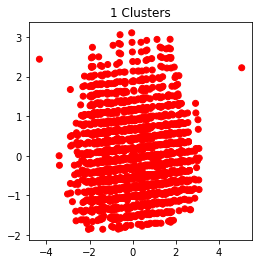

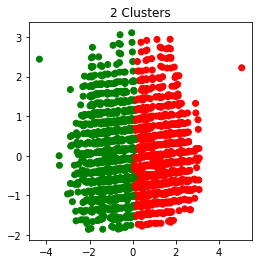

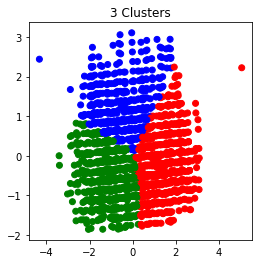

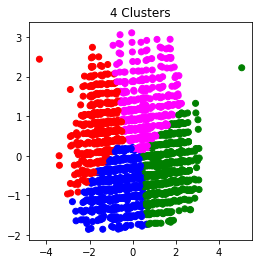

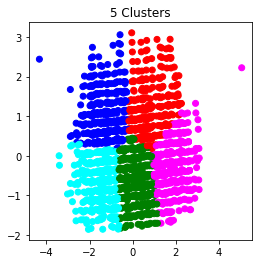

In [19]:
# Check for up to 5 physical clusters
for nn in range(1,6):
    clust = P3(nn, physicalDF.iloc[:, :-1])
# 2 clusters is fine

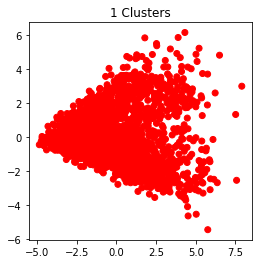

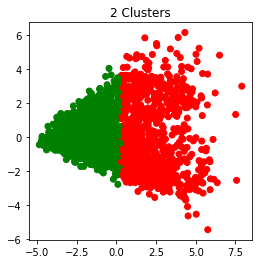

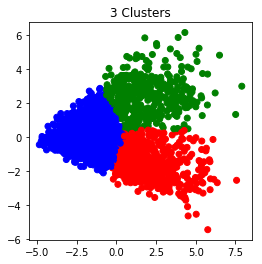

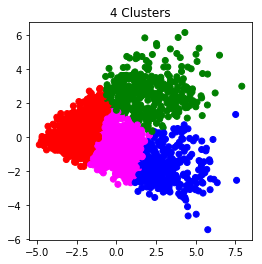

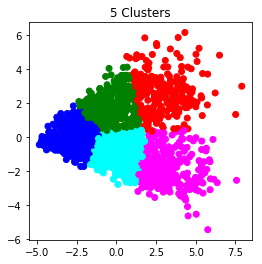

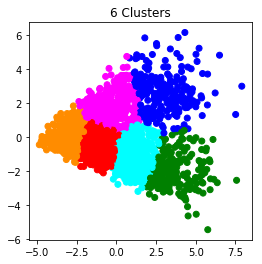

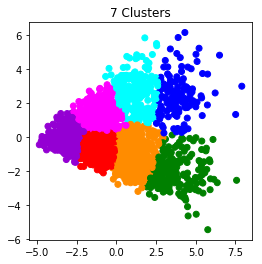

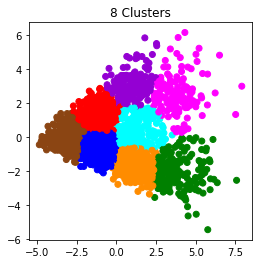

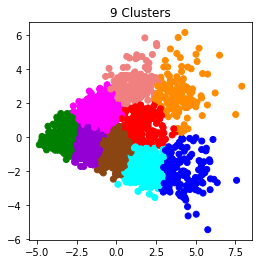

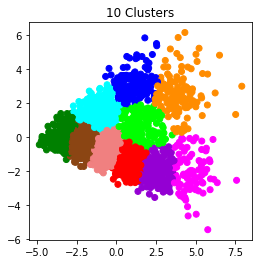

In [20]:
# Check for up to 10 clusters
for nn in range(1,11):
    clust = P3(nn, regPerfDF.iloc[:, :-1])
# probably 3 clusters

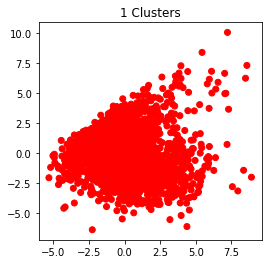

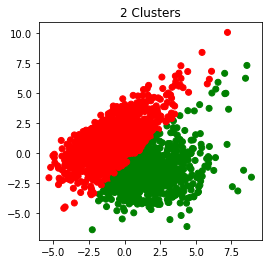

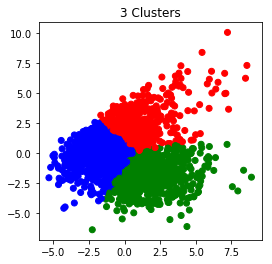

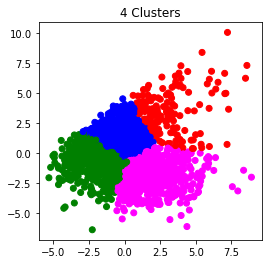

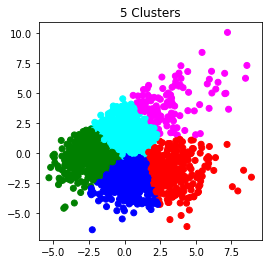

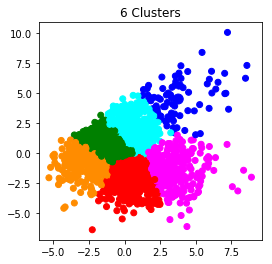

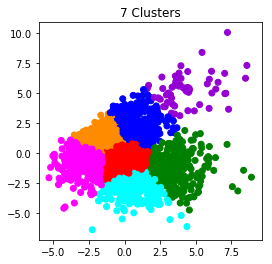

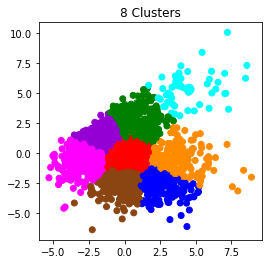

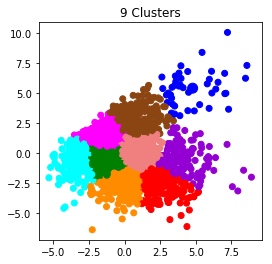

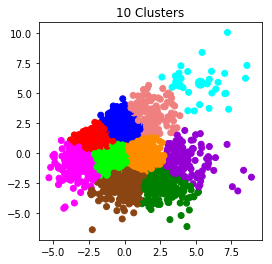

In [21]:
# Check for up to 10 advanced perf clusters
for nn in range(1,11):
    clust = P3(nn, advPerfDF.iloc[:, :-1])
# none of them look good

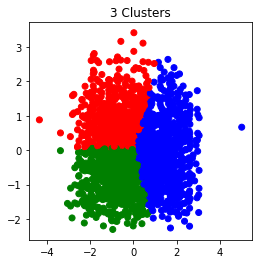

In [23]:
#output images to png
####
# changed function for this, make sure to change back if testing clusters
clust = P3(3, physicalDF.iloc[:, :-1])

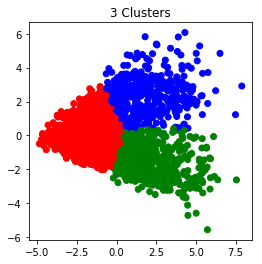

In [25]:
# changed function again, ^^
clust = P3(3, regPerfDF.iloc[:, :-1])

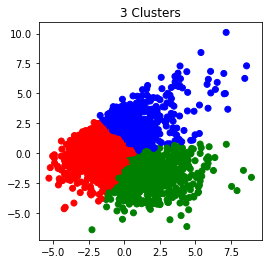

In [14]:
# changed function once more, will change back after
clust = P3(3, advPerfDF.iloc[:, :-1])